


# Construct deep architectures for CNN models


### **Description: Selecting deepness of network by number of convolutional and pooling layers in a sequence Interpret notation**


### Algorithm:

**--> Step 1:** Open preprocessed dataset  
**--> Step 2:** Convert classes vectors to binary matrices  
**--> Step 3:** Choose **number of Convolutional-Pooling pairs**  
**--> Step 4:** Visualize built CNN models  
**--> Step 5:** Set up learning rate & epochs  
**--> Step 6:** Train built CNN models  
**--> Step 7:** Show and plot accuracies  
**--> Step 8:** Make a conclusion  


**Result:**  
- Chosen architecture for every preprocessed dataset  


## Importing libraries

In [32]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py


from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout 
from keras.callbacks import LearningRateScheduler
from keras.utils import plot_model

## Setting up full path to preprocessed datasets

In [2]:
# Full or absolute path to preprocessed datasets
full_path_to_code = \
    'C:/Users/yashs/PycharmProjects/InternshipCNN/TCS'

## Opening preprocessed dataset

In [3]:
# Opening saved custom dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
with h5py.File(full_path_to_code + '/' + 'custom' + '/' +
               'dataset_custom_rgb_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [4]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(3240, 64, 64, 3)
(3240,)
(1110, 64, 64, 3)
(1110,)
(278, 64, 64, 3)
(278,)


## Converting classes vectors to classes matrices

In [5]:
# Showing class index from the vector
print('Class index from vector:', y_train[0])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
y_train = to_categorical(y_train, num_classes = 5)
y_validation = to_categorical(y_validation, num_classes = 5)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[0])


Class index from vector: 3

(3240, 5)
(1110, 5)

Class index from matrix: [0. 0. 0. 1. 0.]


## Choosing number of Convolutional-Pooling pairs

In [6]:
# Building 1st model
# RGB --> {8C5-P2} --> 128 --> 5

# Initializing model to be as linear stack of layers
model_1 = Sequential()

# Adding first pair {8C5-P2}
model_1.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
model_1.add(MaxPool2D())

# Adding fully connected layers
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(5, activation='softmax'))

# Compiling created model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print('1st model is compiled successfully')



# Building 2nd model
# RGB --> {8C5-P2} --> {16C5-P2} --> 128 --> 5

# Initializing model to be as linear stack of layers
model_2 = Sequential()

# Adding first pair {8C5-P2}
model_2.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
model_2.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_2.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_2.add(MaxPool2D())

# Adding fully connected layers
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(5, activation='softmax'))

# Compiling created model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print('2nd model is compiled successfully')



# Building 3rd model
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> 128 --> 5

# Initializing model to be as linear stack of layers
model_3 = Sequential()

# Adding first pair {8C5-P2}
model_3.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
model_3.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_3.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_3.add(MaxPool2D())

# Adding third pair {32C5-P2}
model_3.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model_3.add(MaxPool2D())

# Adding fully connected layers
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(5, activation='softmax'))

# Compiling created model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print('3rd model is compiled successfully')



# Building 4th model
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> {64C5-P2} --> 128 --> 5

# Initializing model to be as linear stack of layers
model_4 = Sequential()

# Adding first pair {8C5-P2}
model_4.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
model_4.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_4.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding third pair {32C5-P2}
model_4.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding fourth pair {64C5-P2}
model_4.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding fully connected layers
model_4.add(Flatten())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(5, activation='softmax'))

# Compiling created model
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print('4th model is compiled successfully')


1st model is compiled successfully
2nd model is compiled successfully
3rd model is compiled successfully
4th model is compiled successfully


## Summarizing built CNN models

In [7]:
# Showing model's summary in form of table
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 1,049,957
Trainable params: 1,049,957
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Showing model's summary in form of table
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 8)         608       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [9]:
# Showing model's summary in form of table
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 8)         608       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 16)        3216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [10]:
# Showing model's summary in form of table
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 8)         608       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 16)        3216      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        12832     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)         

## Setting up learning rate & epochs

In [12]:
# Defining number of epochs
epochs = 20

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


## Training built CNN models

In [13]:
# Training 1st model
h_1 = model_1.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 2nd model
h_2 = model_2.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 3rd model
h_3 = model_3.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 4th model
h_4 = model_4.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)



Epoch 00001: LearningRateScheduler reducing learning rate to 0.0003584859224085419.
Epoch 1/20
65/65 [==============================] - 2s 36ms/step - loss: 1.3548 - accuracy: 0.4559 - val_loss: 1.1199 - val_accuracy: 0.5180

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0003405616262881148.
Epoch 2/20
65/65 [==============================] - 2s 33ms/step - loss: 1.0159 - accuracy: 0.5688 - val_loss: 1.0010 - val_accuracy: 0.6045

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000323533544973709.
Epoch 3/20
65/65 [==============================] - 2s 36ms/step - loss: 0.8850 - accuracy: 0.6401 - val_loss: 1.0383 - val_accuracy: 0.5514

Epoch 00004: LearningRateScheduler reducing learning rate to 0.00030735686772502356.
Epoch 4/20
65/65 [==============================] - 2s 35ms/step - loss: 0.7883 - accuracy: 0.6858 - val_loss: 0.9697 - val_accuracy: 0.5910

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0002919890243387724.
Epoch 5/20


65/65 [==============================] - 3s 52ms/step - loss: 0.0791 - accuracy: 0.9917 - val_loss: 1.3298 - val_accuracy: 0.6234

Epoch 00018: LearningRateScheduler reducing learning rate to 0.00014989025404881545.
Epoch 18/20
65/65 [==============================] - 3s 53ms/step - loss: 0.0654 - accuracy: 0.9941 - val_loss: 1.3298 - val_accuracy: 0.6171

Epoch 00019: LearningRateScheduler reducing learning rate to 0.00014239574134637466.
Epoch 19/20
65/65 [==============================] - 3s 53ms/step - loss: 0.0538 - accuracy: 0.9972 - val_loss: 1.3724 - val_accuracy: 0.6315

Epoch 00020: LearningRateScheduler reducing learning rate to 0.00013527595427905592.
Epoch 20/20
65/65 [==============================] - 3s 52ms/step - loss: 0.0469 - accuracy: 0.9972 - val_loss: 1.4008 - val_accuracy: 0.6216

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0003584859224085419.
Epoch 1/20
65/65 [==============================] - 4s 67ms/step - loss: 1.3278 - accuracy: 0.4123 - 

## Showing and plotting accuracies

In [14]:
# Accuracies of the 1st model
print('Model 1: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_1.history['accuracy']),
                                                                  max(h_1.history['val_accuracy'])))


# Accuracies of the 2nd model
print('Model 2: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_2.history['accuracy']),
                                                                  max(h_2.history['val_accuracy'])))


# Accuracies of the 3rd model
print('Model 3: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_3.history['accuracy']),
                                                                  max(h_3.history['val_accuracy'])))


# Accuracies of the 4th model
print('Model 4: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                          format(max(h_4.history['accuracy']),
                                                                 max(h_4.history['val_accuracy'])))


Model 1: Training accuracy=0.99105, Validation accuracy=0.61261
Model 2: Training accuracy=0.99722, Validation accuracy=0.63153
Model 3: Training accuracy=0.92994, Validation accuracy=0.65766
Model 4: Training accuracy=0.95370, Validation accuracy=0.66306


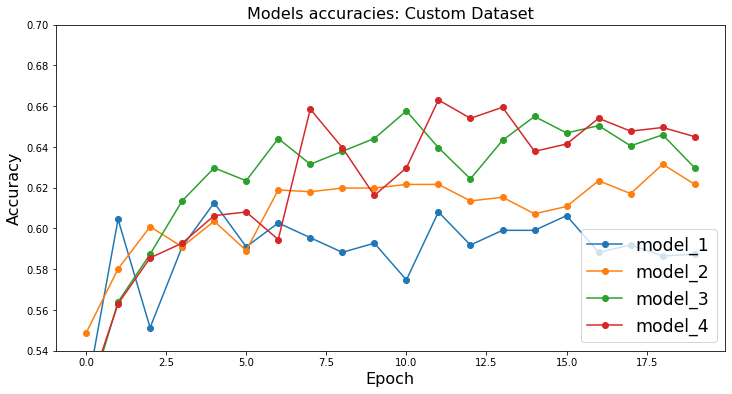

In [15]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h_1.history['val_accuracy'], '-o')
plt.plot(h_2.history['val_accuracy'], '-o')
plt.plot(h_3.history['val_accuracy'], '-o')
plt.plot(h_4.history['val_accuracy'], '-o')


# Setting limit along Y axis
plt.ylim(0.54, 0.7)


# Showing legend
plt.legend(['model_1', 'model_2', 'model_3', 'model_4'], loc='lower right', fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Models accuracies: Custom Dataset', fontsize=16)


# Showing the plot
plt.show()


In [16]:
# Showing list of scheduled learning rate for every epoch
print(h_1.history['lr'])


[0.00035848594, 0.00034056162, 0.00032353355, 0.00030735688, 0.000291989, 0.00027738957, 0.0002635201, 0.00025034408, 0.00023782688, 0.00022593554, 0.00021463877, 0.00020390682, 0.00019371149, 0.0001840259, 0.00017482461, 0.00016608338, 0.00015777921, 0.00014989026, 0.00014239574, 0.00013527596]


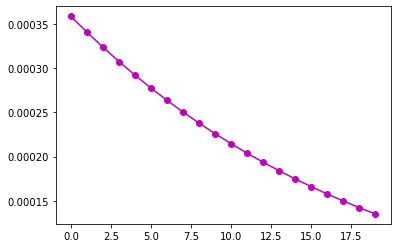

In [17]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h_1.history['lr'], '-mo')


# Showing the plot
plt.show()


## Conclusion

In [18]:
# According to validation accuracy, the 4th model has the highest value

# RGB input --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> {64C5-P2} --> 128 --> 5
# GRAY input --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> {64C5-P2} --> 128 --> 5

# RGB input: (64, 64, 3)
# GRAY input: (64, 64, 1)
